# **Breast Cancer Grading AI**

## **Disclaimer**
<span style="color:red"> This project, AI Breast Cancer Grader, is developed for educational and research purposes only. The model is trained on a limited dataset of histopathological images and is not validated for clinical or diagnostic use.
Predictions generated by this system should not be considered medical advice and should not be used for real-world medical decision-making without the supervision and validation of certified medical professionals.
The developer and contributors of this project disclaim any liability for decisions made based on the outputs of this application. Always consult with qualified healthcare providers for accurate diagnosis and treatment.</span><span style="color:red">© Copyright Notice 2024.
<span style="color:black"> AKEEM ASIRU - VIZAQ LLC - All Rights Reserved.

**Background**

Breast Invasive Ductal Carcinoma (IDC)

    IDC is the most common type of breast cancer (about 70-80% of cases)
    Detecting and grading these carcinomas early is crucial for patient survival and treatment planning.
    
Grading, in Pathology, refers to assessing how much Breast cancer cells differ from healthy cells under a microscope — which reflects how aggressive the tumor might be.

Common grading scale:

    Grade 1 (low): Cancer cells look a lot like normal cells and grow slowly.

    Grade 2 (intermediate): Cancer cells look less like normal cells and grow a bit faster.

    Grade 3 (high): Cancer cells look very abnormal and grow quickly.

**Objective**
The aim of this project is 
- To develop AI Breast Cancer Grader for early detection through automated systems to assist pathologists in diagnosing breast cancer faster and more consistently.
- High performance of the Model using Deep learning tools like CNNs with transfer learning using ResNet50 that is pretrained on Imagenet.

**Dataset**
A typical histopathological IDC dataset includes:

    Microscopic images of breast tissue

    Labels indicating whether the image shows:

        IDC positive (cancerous)

        IDC negative (healthy or benign)

    Sometimes includes grading information (Grade 1, 2, 3)

    Each image might be in RGB format, commonly resized to 50x50 or 224x224 pixels for deep learning models.

In [197]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [199]:
# Set basic parameters
img_height, img_width = 224, 224
batch_size = 16
num_classes = 3  # Adjust based on your number of grades
data_dir = "C:/Users/ebony/Downloads/Breast Cancer Grade"

In [201]:
# 📊 Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

In [203]:
# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42
)


Found 364 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


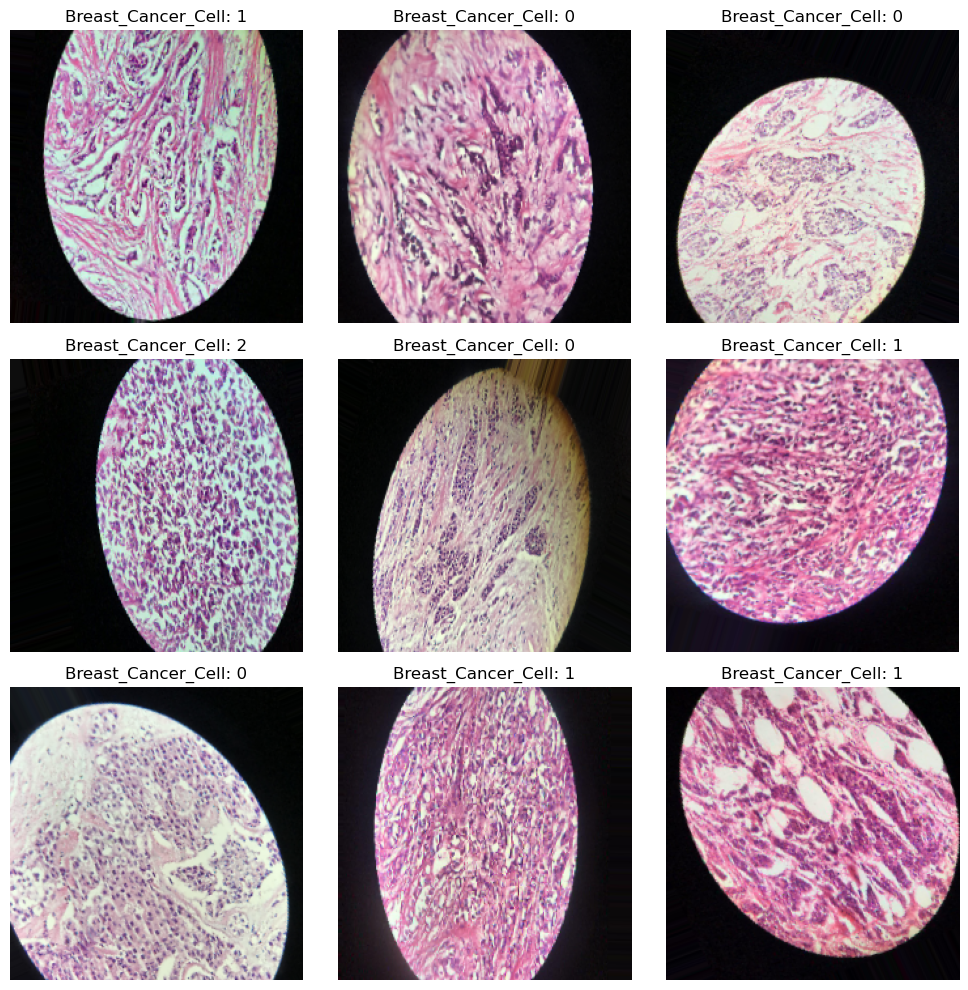

In [205]:
# Vizualization of the Cancer Cells

images, Cancer_Cell = next(train_generator)

# Plot 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Breast_Cancer_Cell: {np.argmax(Cancer_Cell[i])}")  # or map this to class names if needed
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Load ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze base model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [17]:
 # Build top model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

In [19]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
#  Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [23]:
# Initial Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)

C:\Users\ebony\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accuracy: 0.3557 - loss: 1.4249 - val_accuracy: 0.3111 - val_loss: 1.1551
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.3396 - loss: 1.2754 - val_accuracy: 0.4000 - val_loss: 1.1032
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.3766 - loss: 1.2494 - val_accuracy: 0.4000 - val_loss: 1.0888
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.3367 - loss: 1.2608 - val_accuracy: 0.4000 - val_loss: 1.0837
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.3590 - loss: 1.2058 - val_accuracy: 0.3222 - val_loss: 1.0855
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.3742 - loss: 1.1830 - val_accuracy: 0.4000 - val_loss: 1.0807
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.3402 - loss: 1.1930 - val_accuracy: 0.4000 - val_loss: 1.0702
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.3358 - loss: 1.1518 - val_accuracy: 0.4667 - val_loss

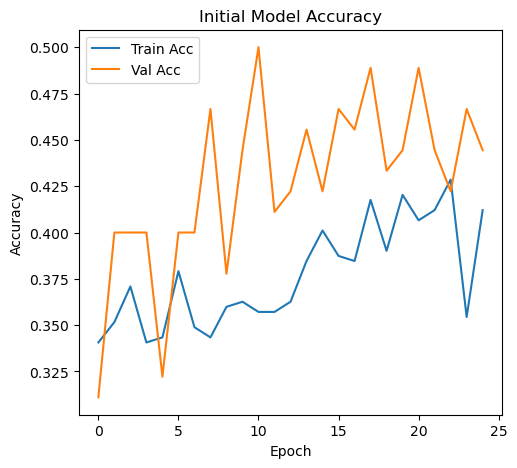

In [25]:
#  Plot Accuracy and Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Initial Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

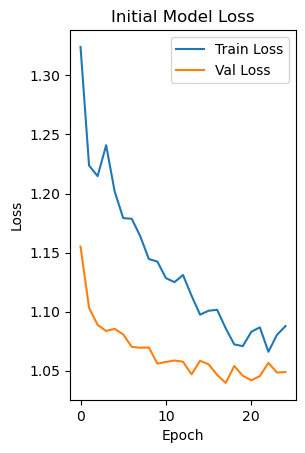

In [27]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Initial Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# 📌 Fine-tuning: Unfreeze top layers of ResNet50
base_model.trainable = True

# Freeze all layers except top 30 (fine-tune last 30 layers)
for layer in base_model.layers[:-30]:
    layer.trainable = False

# 📑 Re-compile with lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [38]:
# 🚀 Fine-tuning training
fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)



Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 128s 5s/step - accuracy: 0.4226 - loss: 1.0847 - val_accuracy: 0.4000 - val_loss: 1.0709
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.4787 - loss: 1.0511 - val_accuracy: 0.4000 - val_loss: 1.1091
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5189 - loss: 1.0100 - val_accuracy: 0.4000 - val_loss: 1.1175
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5389 - loss: 0.9948 - val_accuracy: 0.4000 - val_loss: 1.1279
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.4212 - loss: 1.0482 - val_accuracy: 0.4000 - val_loss: 1.1367
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.4654 - loss: 1.0295 - val_accuracy: 0.4111 - val_loss: 1.1074
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.4703 - loss: 1.0266 - val_accuracy: 0.3889 - val_loss: 1.0970
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.4827 - loss: 1.0018 - val_accuracy: 0.4000 - val_loss

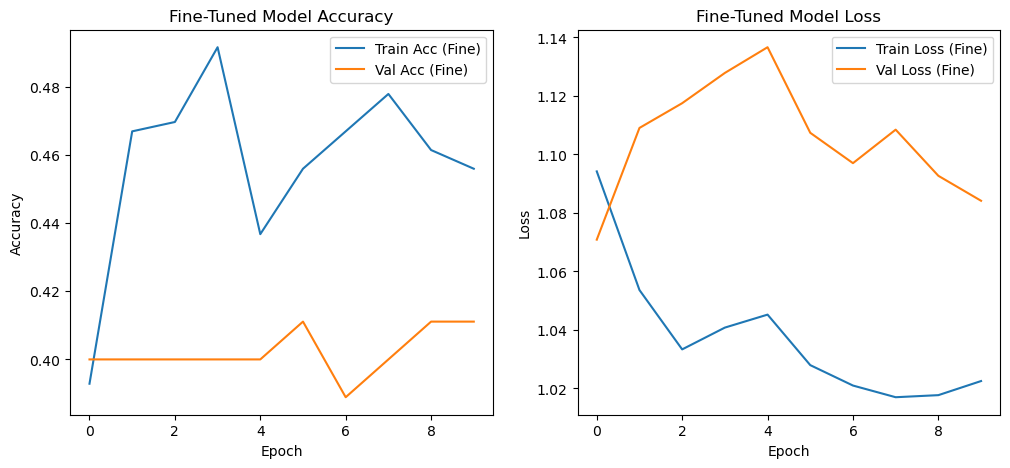

In [51]:
# 📊 Plot Fine-tuning Accuracy and Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fine_tune_history.history['accuracy'], label='Train Acc (Fine)')
plt.plot(fine_tune_history.history['val_accuracy'], label='Val Acc (Fine)')
plt.title('Fine-Tuned Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(fine_tune_history.history['loss'], label='Train Loss (Fine)')
plt.plot(fine_tune_history.history['val_loss'], label='Val Loss (Fine)')
plt.title('Fine-Tuned Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [65]:
model.save('breast_idc_resnet_finetuned_model.h5')
print("✅ Model saved successfully.")

✅ Model saved successfully.


In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Image path
img_path = 'C:/Users/ebony/Downloads/cancer_test_data_dir/37_BC_G1_12668_4x_1.jpg'

# Load image and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize like training data

### Load and Preprocess Test Image - Testing the model Prediction

In [83]:
# Predict class probabilities - single image file
prediction = model.predict(img_array)

# Get predicted class index
predicted_class = np.argmax(prediction)

# Class labels (update as per your training class indices)
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

print(f"Predicted Class: {class_labels[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Grade 1


In [87]:
# Predict class probabilities - many files in a folder
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'C:/Users/ebony/Downloads/testflow',
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False
)
# Class labels (update as per your training class indices)
#class_labels = ['Grade 1', 'Grade 2', 'Grade 3']
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to labels
for i, pred in enumerate(predicted_classes):
    print(f"Image {test_generator.filenames[i]} → {class_labels[pred]}")

Found 9 images belonging to 3 classes.
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step
Image Grade 1\37_BC_G1_12668_10x_1.jpg → Grade 1
Image Grade 1\37_BC_G1_12668_20x_1.jpg → Grade 2
Image Grade 1\37_BC_G1_12668_4x_1.jpg → Grade 1
Image Grade 2\43_BC_G2_12733_10x_1.jpg → Grade 1
Image Grade 2\43_BC_G2_12733_20x_1.jpg → Grade 2
Image Grade 2\43_BC_G2_12733_4x_1.jpg → Grade 1
Image Grade 3\43_BC_G3_112714_4x_1.jpg → Grade 1
Image Grade 3\43_BC_G3_12714_10x_1.jpg → Grade 1
Image Grade 3\43_BC_G3_12714_20x_1.jpg → Grade 2
